Sarah Crane

11-29-25

DS5110 - Essentials of Data Science - Professor Bockmon

Comparison of digital vs print revenue over time/area

# Data Exploration & Static Visualizations

In [1]:
# Import Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in file & view first 5 lines
metln = pd.read_csv('/content/METLN_data.csv')
print(metln.head())

  Publication  AccoutID  Status    Bill Method Dist ID Route ID Day pattern  \
0      MTM_MS    505360  Active  Auto Pay - BD    DST2   WTV058     SXmmmmX   
1      MTM_PT    528751  Active     Office Pay       2   144077     SoTWTFS   
2      MTM_PT   2446127  Active     Office Pay       2   144077     SoTWTFS   
3      MTM_PT    522993  Active     Office Pay       2   144077     SoTWTFS   
4      MTM_PT   2487779  Active  Auto Pay - CC       2   144077     SoTWTFS   

          City State    Zip           Rate Code LastStartDate  \
0   Waterville    ME  04901     MATHER_7DAY_830      04-01-18   
1  Scarborough    ME  04074     MATHER_7DAY_740      04-01-18   
2  Scarborough    ME  04074     MATHER_7DAY_910      05-24-22   
3  Scarborough    ME  04074    MATHER_7DAY_1170      04-01-18   
4  Scarborough    ME  04074  PT_7Day_R_FullRate      11-29-24   

  OriginalStartDate      Date  
0          04-01-18  102025.0  
1          04-01-18  102025.0  
2          05-24-22  102025.0  
3     

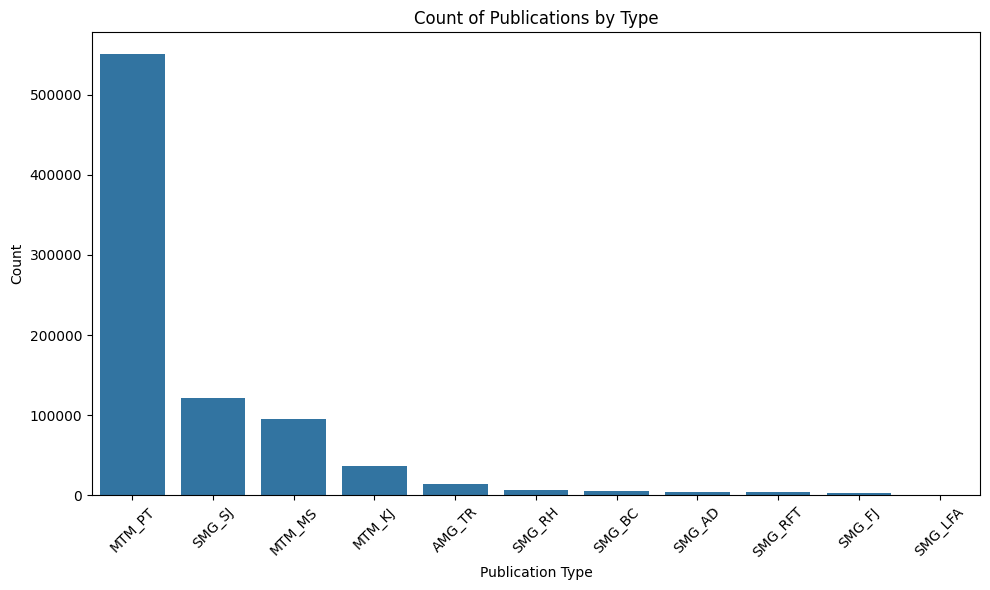

In [3]:
# View Publication Counts
publication_counts = metln['Publication'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=publication_counts.index, y=publication_counts.values)
plt.title('Count of Publications by Type')
plt.xlabel('Publication Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Per emailed notes: O7Day is the day pattern for digital subscriptions. All others describe various print subscription patterns.

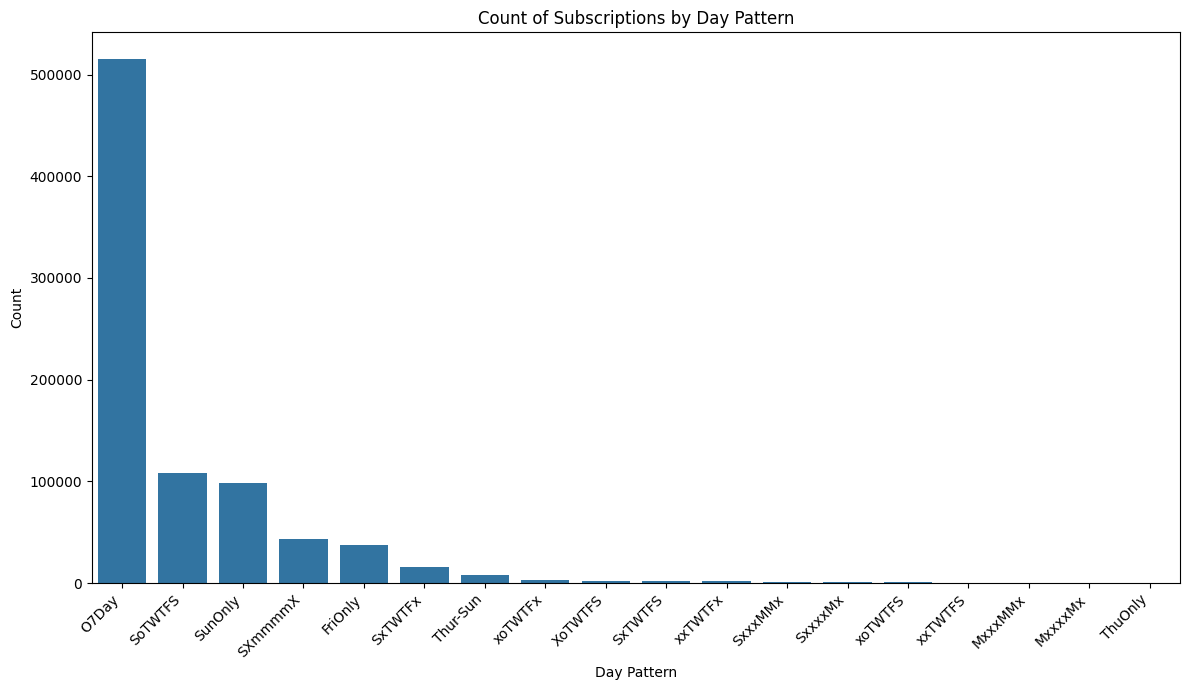

In [4]:
# View Day Pattern Counts
day_pattern_counts = metln['Day pattern'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=day_pattern_counts.index, y=day_pattern_counts.values)
plt.title('Count of Subscriptions by Day Pattern')
plt.xlabel('Day Pattern')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

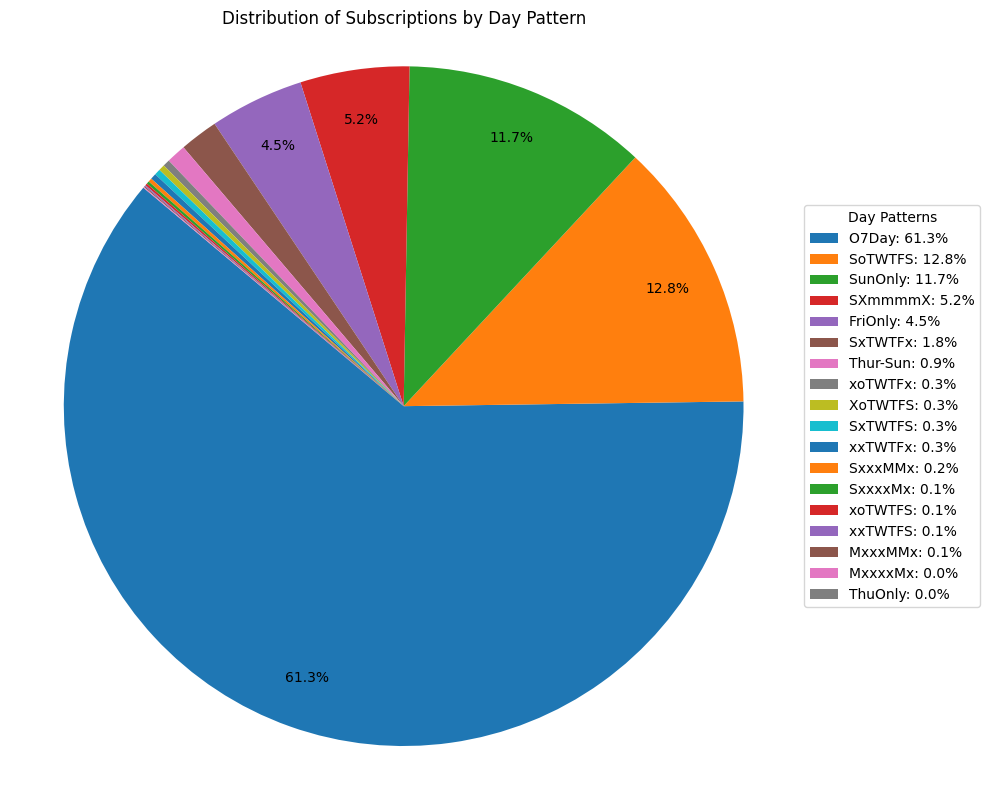

In [5]:
# Pie Chart Visualization of Subs by Day Pattern

# Custom autopct function to only display percentages above a certain threshold
def autopct_format(pct):
    return ('%1.1f%%' % pct) if pct > 2 else ''

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(day_pattern_counts,
                                   autopct=autopct_format,
                                   startangle=140,
                                   pctdistance=0.85)

plt.title('Distribution of Subscriptions by Day Pattern')
plt.axis('equal')

# Create legend, including all labels and their percentages
# Calculate total sum to get actual percentages for the legend
total = day_pattern_counts.sum()
legend_labels = [f'{label}: {count / total:.1%}' for label, count in day_pattern_counts.items()]

plt.legend(wedges, legend_labels, title="Day Patterns", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

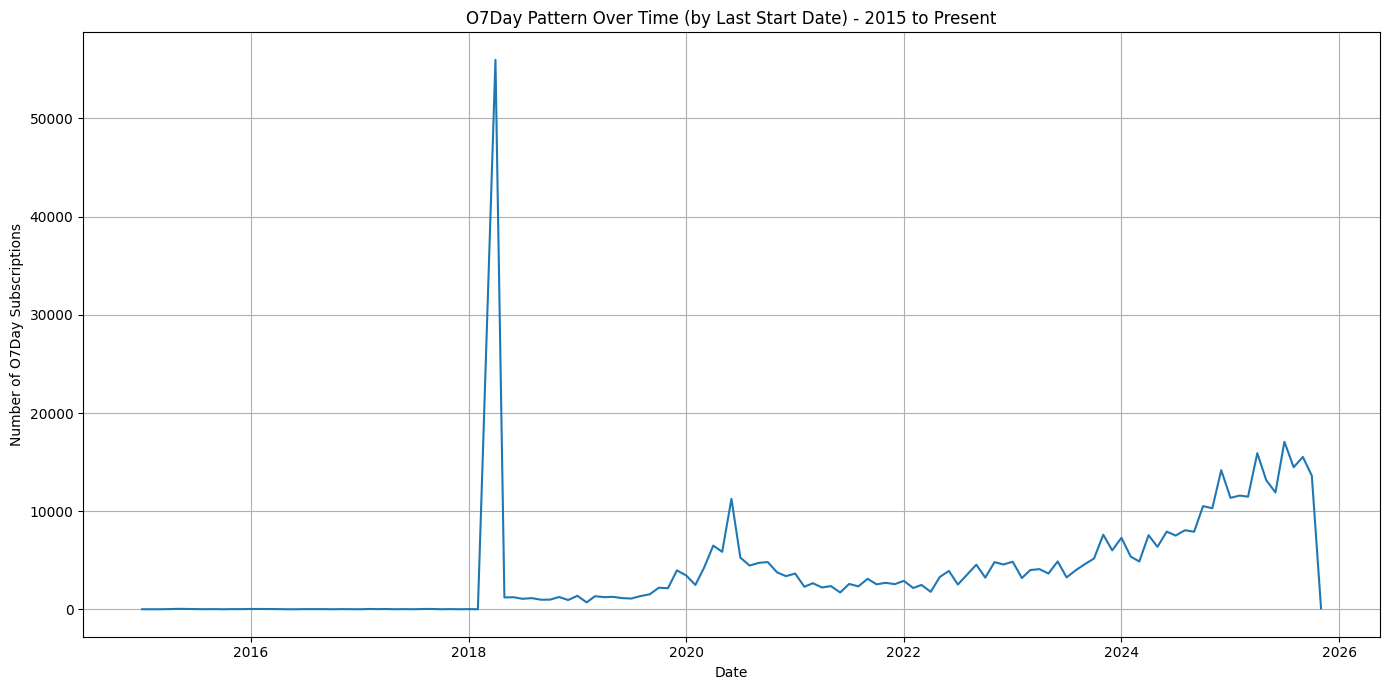

In [6]:
# 07Day Pattern Visualization over Time

# Convert 'LastStartDate' to datetime objects
metln['LastStartDate'] = pd.to_datetime(metln['LastStartDate'], format='%m-%d-%y', errors='coerce')

# Filter for 'O7Day' pattern
o7day_data = metln[metln['Day pattern'] == 'O7Day']

# Group by month and year of 'LastStartDate' and count occurrences
o7day_over_time = o7day_data.groupby(o7day_data['LastStartDate'].dt.to_period('M')).size()
o7day_over_time = o7day_over_time.rename_axis('Date').reset_index(name='Count')
o7day_over_time['Date'] = o7day_over_time['Date'].dt.to_timestamp()

# Filter data from 2015 to present
o7day_over_time_filtered = o7day_over_time[o7day_over_time['Date'].dt.year >= 2015]

# Plotting the 'O7Day' pattern over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Count', data=o7day_over_time_filtered)
plt.title('O7Day Pattern Over Time (by Last Start Date) - 2015 to Present')
plt.xlabel('Date')
plt.ylabel('Number of O7Day Subscriptions')
plt.grid(True)
plt.tight_layout()
plt.show()

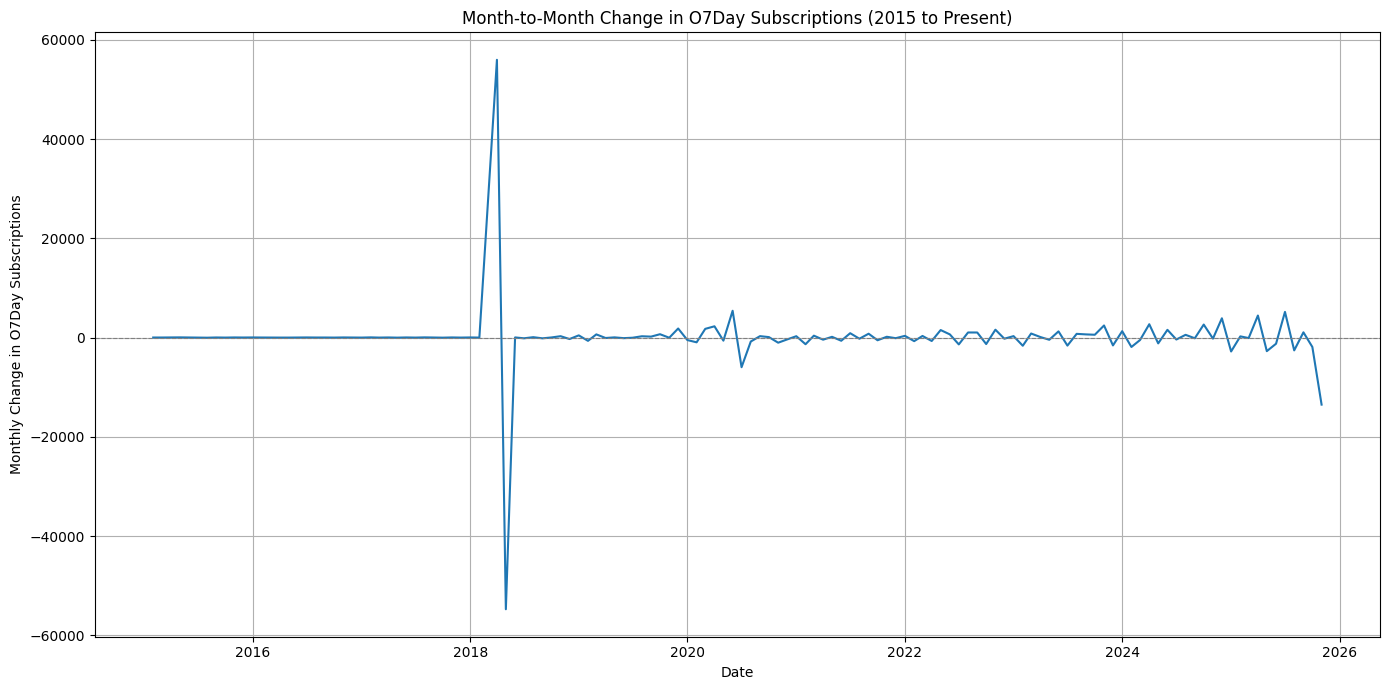

In [7]:
# Calculate month-to-month change in 'O7Day' subscriptions
# Ensure o7day_over_time_filtered is sorted by Date to correctly calculate diff
o7day_over_time_filtered = o7day_over_time_filtered.sort_values(by='Date').copy()
o7day_over_time_filtered['Monthly_Change'] = o7day_over_time_filtered['Count'].diff()

# Plotting the month-to-month change
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Monthly_Change', data=o7day_over_time_filtered)
plt.title('Month-to-Month Change in O7Day Subscriptions (2015 to Present)')
plt.xlabel('Date')
plt.ylabel('Monthly Change in O7Day Subscriptions')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

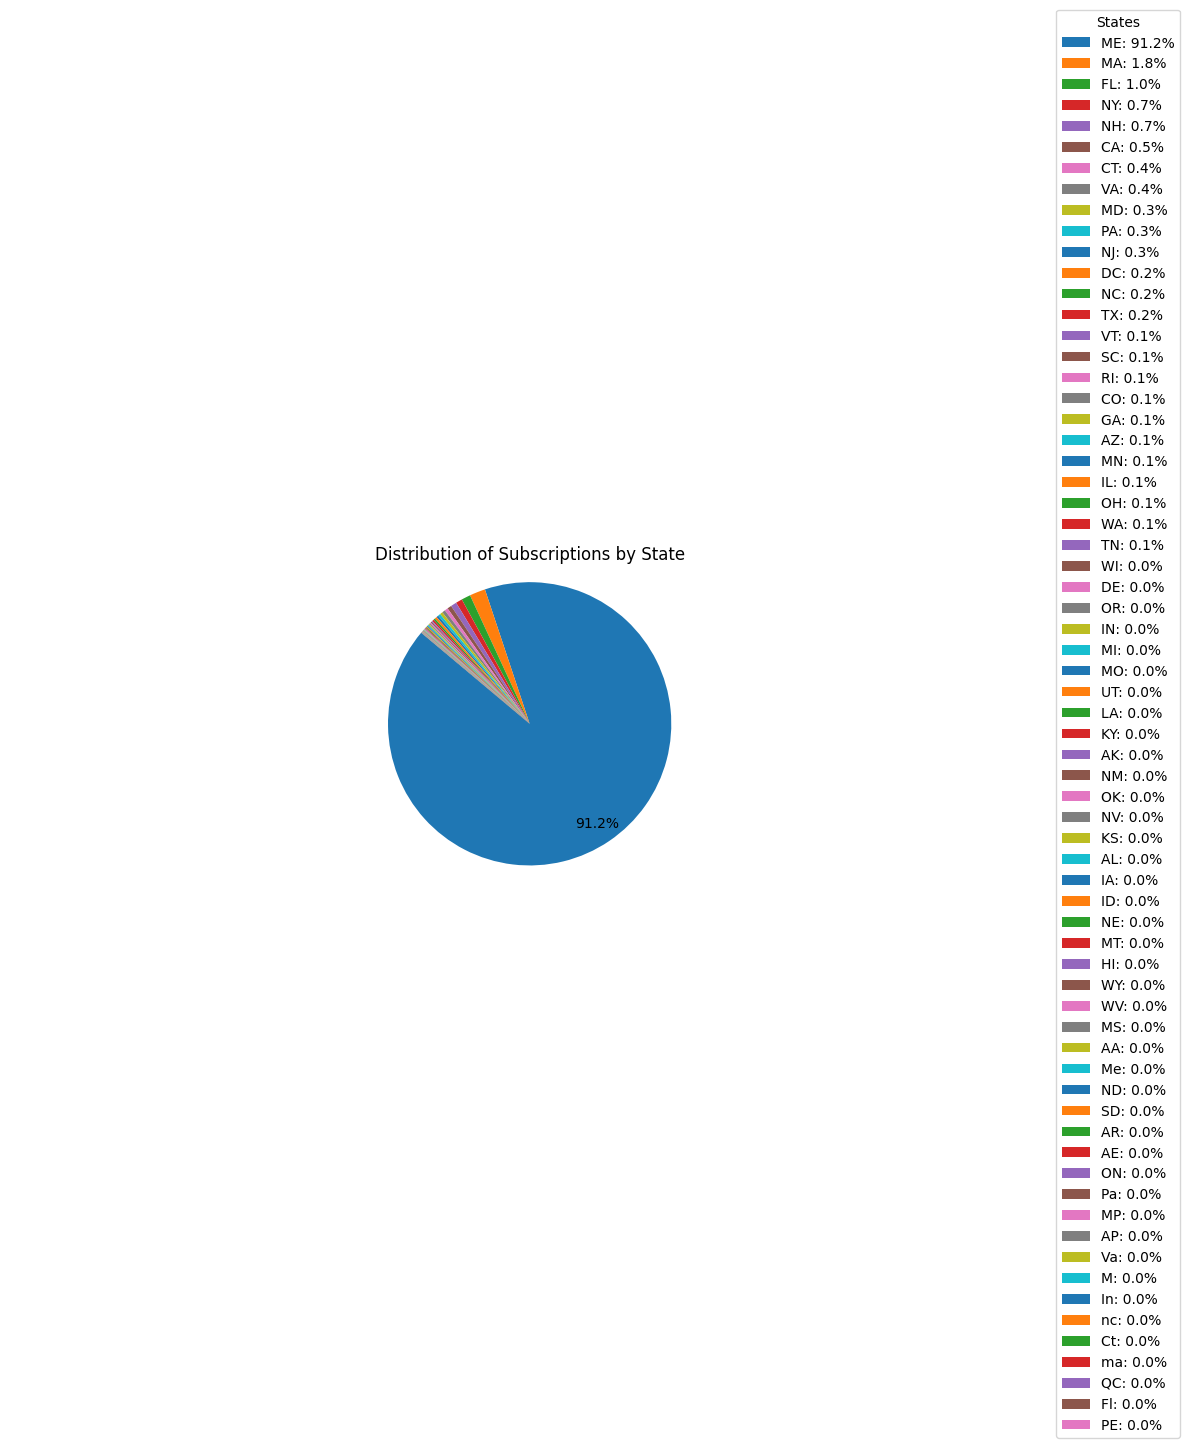

In [8]:
# Calculate state counts
state_counts = metln['State'].value_counts()

# Custom autopct function to only display percentages above a certain threshold
def autopct_format(pct):
    return ('%1.1f%%' % pct) if pct > 2 else ''

plt.figure(figsize=(12, 10))
wedges, texts, autotexts = plt.pie(state_counts,
                                   autopct=autopct_format,
                                   startangle=140,
                                   pctdistance=0.85)

plt.title('Distribution of Subscriptions by State')
plt.axis('equal')

# Create legend, including all labels and their percentages
total_state_subs = state_counts.sum()
legend_labels_state = [f'{label}: {count / total_state_subs:.1%}' for label, count in state_counts.items()]

plt.legend(wedges, legend_labels_state, title="States", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

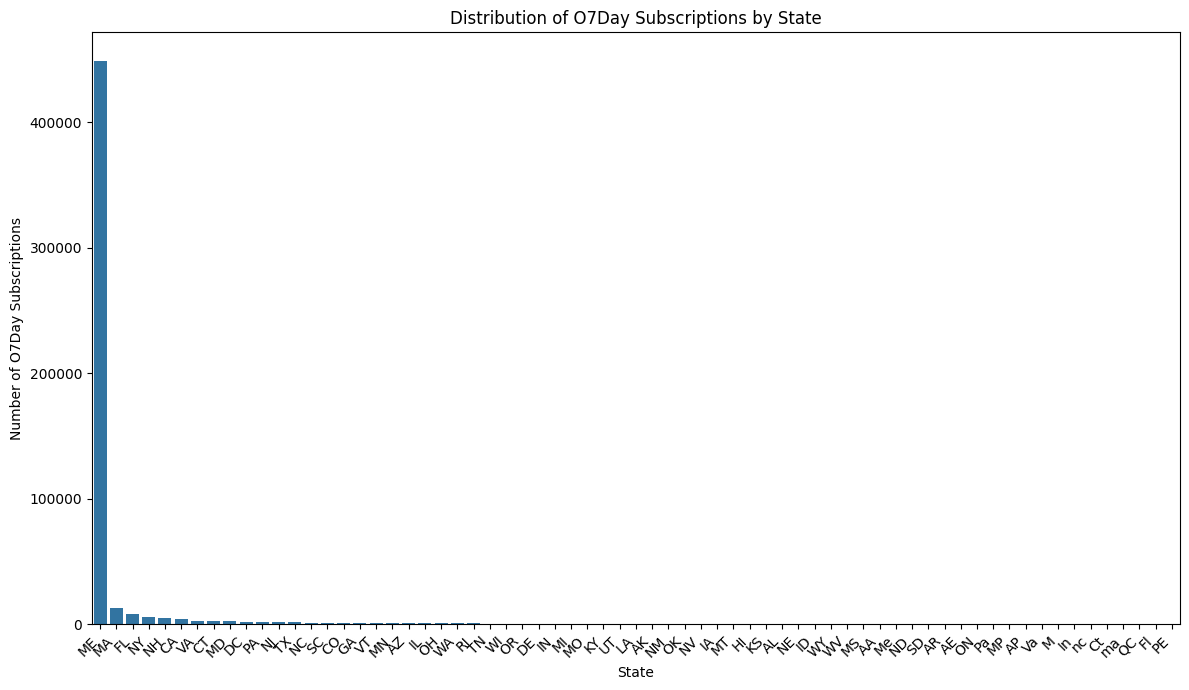

In [9]:
# Explore Digital Subscriptions by State

# Filter for 'O7Day' pattern
o7day_by_state = metln[metln['Day pattern'] == 'O7Day']

# Calculate state counts for 'O7Day' pattern
o7day_state_counts = o7day_by_state['State'].value_counts()

# Plotting the 'O7Day' pattern by state
plt.figure(figsize=(12, 7))
sns.barplot(x=o7day_state_counts.index, y=o7day_state_counts.values)
plt.title('Distribution of O7Day Subscriptions by State')
plt.xlabel('State')
plt.ylabel('Number of O7Day Subscriptions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
#Normalize City Names
metln['City'] = metln['City'].str.lower()
print(metln['City'].head())

0     waterville
1    scarborough
2    scarborough
3    scarborough
4    scarborough
Name: City, dtype: object


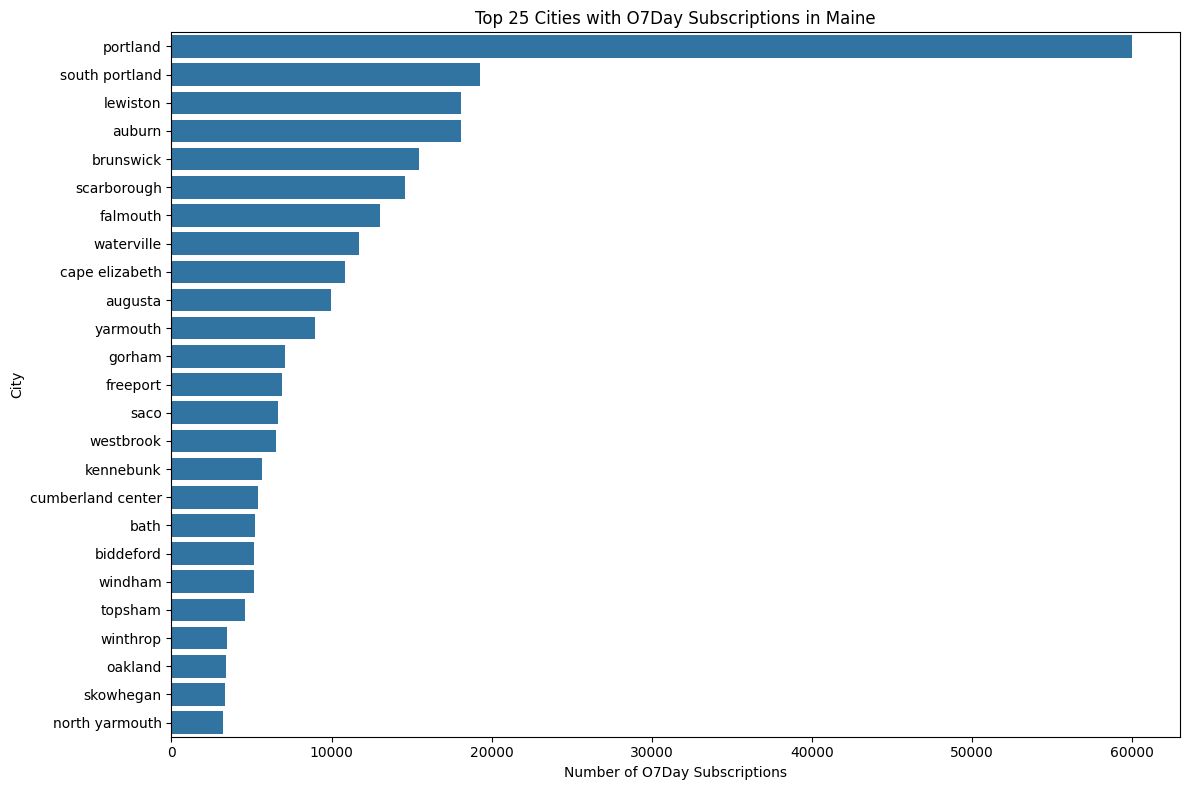

In [19]:
# Filter for 'O7Day' pattern and 'ME' state
o7day_maine_data = metln[(metln['Day pattern'] == 'O7Day') & (metln['State'] == 'ME')]

# Calculate city counts for 'O7Day' pattern in Maine
o7day_maine_city_counts = o7day_maine_data['City'].value_counts()

# Get the top N cities for better readability
N = 25
top_cities = o7day_maine_city_counts.head(N).sort_values(ascending=False)

# Plotting the 'O7Day' pattern by city in Maine as a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title(f'Top {N} Cities with O7Day Subscriptions in Maine')
plt.xlabel('Number of O7Day Subscriptions')
plt.ylabel('City')
plt.tight_layout()
plt.show()

Notes & Challenges:

* Inconsistent town naming would require further data pre-processing to combine and re-format town names to be of like terms ('Portland' and 'PORTLAND' should not be separated...)

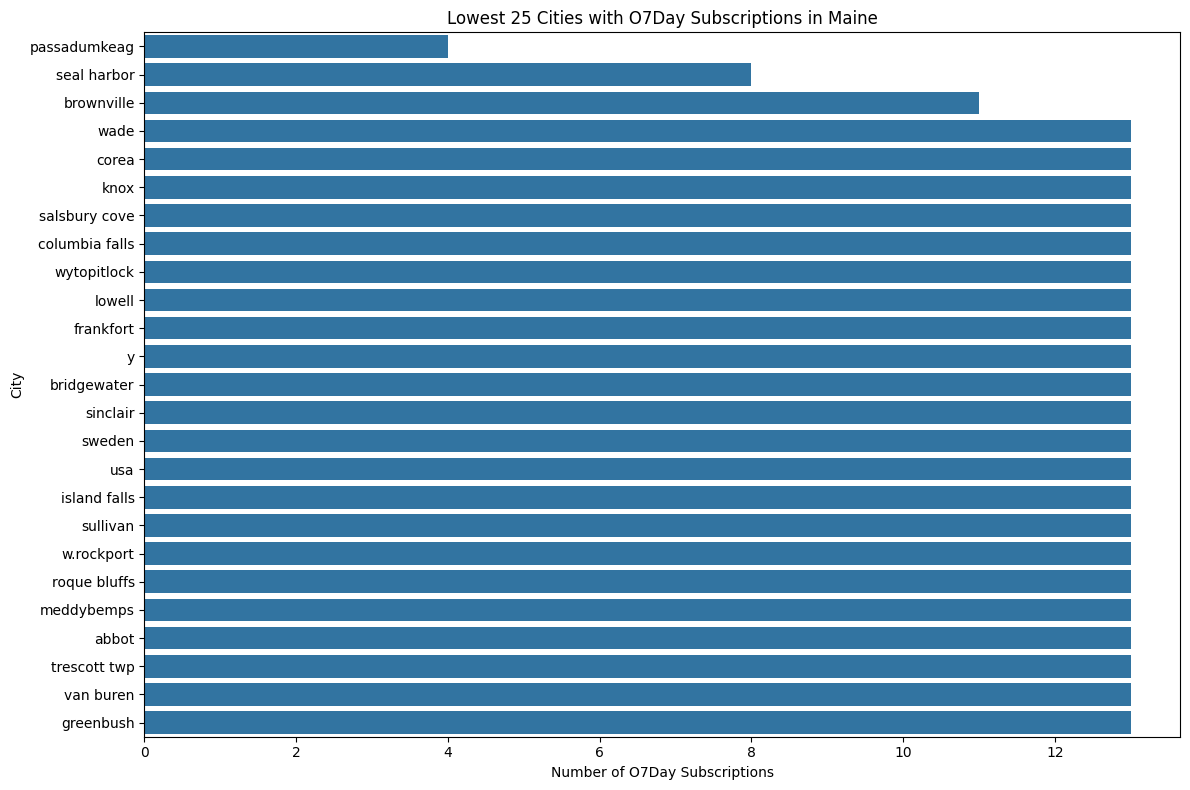

In [20]:
# Filter for 'O7Day' pattern and 'ME' state
o7day_maine_data = metln[(metln['Day pattern'] == 'O7Day') & (metln['State'] == 'ME')]

# Calculate city counts for 'O7Day' pattern in Maine
o7day_maine_city_counts = o7day_maine_data['City'].value_counts()

# Get the lowest N cities for better readability
N = 25
lowest_cities = o7day_maine_city_counts.sort_values(ascending=True).head(N)

# Plotting the 'O7Day' pattern by city in Maine as a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=lowest_cities.values, y=lowest_cities.index)
plt.title(f'Lowest {N} Cities with O7Day Subscriptions in Maine')
plt.xlabel('Number of O7Day Subscriptions')
plt.ylabel('City')
plt.tight_layout()
plt.show()

Notes & Challenges:

* Use of abbreviations in town names poses issues with geocoding.



# Create Map Visualization of Highest & Lowest Digital Subscriptions by City


Install Geocoding Library

Resource: https://geopy.readthedocs.io/en/stable/


In [ ]:
!pip install geopy

Geocode Cities

Obtain latitude and longitude coordinates for each of the top 25 and lowest 25 cities in Maine.


In [12]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time

# 1. Create an instance of Nominatim with a user agent
geolocator = Nominatim(user_agent="city_geocoder")

# 2. Initialize an empty list to store the geocoded city data
geocoded_cities_data = []

# 3. Iterate through the lowest_cities Series and geocode each city
for city_name, count in lowest_cities.items():
    query = f"{city_name}, Maine, USA"
    try:
        location = geolocator.geocode(query, timeout=10)
        if location:
            geocoded_cities_data.append({
                'City': city_name,
                'Count': count,
                'Latitude': location.latitude,
                'Longitude': location.longitude
            })
        else:
            print(f"Could not geocode: {city_name}")
    except (GeocoderTimedOut, GeocoderServiceError) as e:
        print(f"Error geocoding {city_name}: {e}. Retrying after delay...")
        time.sleep(1) # Add a small delay for rate limiting or temporary issues
        location = geolocator.geocode(query, timeout=10)
        if location:
            geocoded_cities_data.append({
                'City': city_name,
                'Count': count,
                'Latitude': location.latitude,
                'Longitude': location.longitude
            })
        else:
            print(f"Could not geocode after retry: {city_name}")
    except Exception as e:
        print(f"An unexpected error occurred for {city_name}: {e}")

# 4. Convert the list of geocoded city data into a pandas DataFrame
geocoded_lowest_cities_df = pd.DataFrame(geocoded_cities_data)

print(geocoded_lowest_cities_df.head())


           City  Count   Latitude  Longitude
0  PASSADUMKEAG      4  45.185095 -68.613276
1   SEAL HARBOR      8  44.303136 -68.240292
2        DRYDEN      8  44.586729 -70.209783
3    BROWNVILLE     11  45.306436 -69.035981
4       Lamoine     13  44.501126 -68.347097


In [13]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time

# 1. Create an instance of Nominatim with a user agent
geolocator = Nominatim(user_agent="city_geocoder_top")

# 2. Initialize an empty list to store the geocoded city data
geocoded_top_cities_data = []

# 3. Iterate through the top_cities Series and geocode each city
for city_name, count in top_cities.items():
    query = f"{city_name}, Maine, USA"
    try:
        location = geolocator.geocode(query, timeout=10)
        if location:
            geocoded_top_cities_data.append({
                'City': city_name,
                'Count': count,
                'Latitude': location.latitude,
                'Longitude': location.longitude
            })
        else:
            print(f"Could not geocode: {city_name}")
    except (GeocoderTimedOut, GeocoderServiceError) as e:
        print(f"Error geocoding {city_name}: {e}. Retrying after delay...")
        time.sleep(1) # Add a small delay for rate limiting or temporary issues
        location = geolocator.geocode(query, timeout=10)
        if location:
            geocoded_top_cities_data.append({
                'City': city_name,
                'Count': count,
                'Latitude': location.latitude,
                'Longitude': location.longitude
            })
        else:
            print(f"Could not geocode after retry: {city_name}")
    except Exception as e:
        print(f"An unexpected error occurred for {city_name}: {e}")

# 8. Convert the list of geocoded city data into a pandas DataFrame
geocoded_top_cities_df = pd.DataFrame(geocoded_top_cities_data)

# 9. Print the first few rows of geocoded_top_cities_df
print(geocoded_top_cities_df.head())

             City  Count   Latitude  Longitude
0        Portland  33601  43.657361 -70.258662
1        PORTLAND  26344  43.657361 -70.258662
2        Lewiston  10972  44.099072 -70.217710
3  SOUTH PORTLAND  10860  43.638244 -70.252919
4          AUBURN  10034  44.096537 -70.224949


Install Mapping Library

Resource: https://folium.readthedocs.io/en/latest/


In [ ]:
!pip install folium

In [14]:
import folium

# Create map Visualization of Highest and Lowest Cities

# Create a map centered around Maine
m = folium.Map(location=[45.2, -69.0], zoom_start=7)

# Add markers for each geocoded lowest cities
for index, row in geocoded_lowest_cities_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"City: {row['City']}<br>O7Day Subscriptions: {row['Count']}",
        tooltip=f"{row['City']} (Lowest)",
        icon=folium.Icon(color='red')
    ).add_to(m)

# Add markers for each geocoded top cities
for index, row in geocoded_top_cities_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"City: {row['City']}<br>O7Day Subscriptions: {row['Count']}",
        tooltip=f"{row['City']} (Top)",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map
m

Notes & Challenges:

*   Out of the 25 cities in Maine with the lowest 'O7Day' subscription counts, 24 cities were successfully geocoded to obtain their latitude and longitude coordinates.
*   A couple cities were difficult to geolocate, "Sandy River Plt", and "Cumb Foreside" could not be geocoded by the Nominatim service, even after a retry attempt.

* One of the lowest cities is simply listed as 'USA'?

* The process successfully geocoded prominent cities such as Portland, South Portland, Lewiston, and Auburn.

# Explore Digital vs Print Subscriptions based on Top and Lowest Cities in Maine

Filter the main dataset (metln) to include only subscriptions from Maine that are not of the 'O7Day' pattern, and then tally these print subscriptions by city.

Identify Print Subscriptions in Maine

In [15]:
print_subscriptions_maine = metln[(metln['State'] == 'ME') & (metln['Day pattern'] != 'O7Day')]

print_city_counts = print_subscriptions_maine['City'].value_counts()

top_print_cities = print_city_counts.head(25)
lowest_print_cities = print_city_counts.sort_values(ascending=True).head(25)

print("Top 25 Cities for Print Subscriptions in Maine:\n", top_print_cities)
print("\nLowest 25 Cities for Print Subscriptions in Maine:\n", lowest_print_cities)

Top 25 Cities for Print Subscriptions in Maine:
 City
Portland             33306
Brunswick            14417
Scarborough          14402
South Portland       14391
Lewiston             11185
Falmouth             10781
Cape Elizabeth        8976
Auburn                8955
Augusta               8682
Gorham                7225
Westbrook             7204
Saco                  7197
Yarmouth              6824
Waterville            5827
Windham               5826
Topsham               5383
Kennebunk             5097
Biddeford             4793
Freeport              4596
Bath                  3597
Wells                 3537
Winslow               3516
Cumberland Center     3473
Old Orchard Beach     3330
Skowhegan             2968
Name: count, dtype: int64

Lowest 25 Cities for Print Subscriptions in Maine:
 City
Masardis                 1
BATH                     3
SOUTH CHINA              8
UNITY                    9
W Boothbay Harbor        9
GREAT DIAMOND ISLAND    12
WINTHROP                1

Geocode Print Cities



In [16]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time

# 2. Create an instance of Nominatim with a user agent
geolocator = Nominatim(user_agent="print_city_geocoder")

# 3. Initialize an empty list to store the geocoded city data for lowest print cities
geocoded_lowest_print_cities_data = []

# 4. Iterate through the lowest_print_cities Series and geocode each city
for city_name, count in lowest_print_cities.items():
    query = f"{city_name}, Maine, USA"
    try:
        location = geolocator.geocode(query, timeout=10)
        if location:
            geocoded_lowest_print_cities_data.append({
                'City': city_name,
                'Count': count,
                'Latitude': location.latitude,
                'Longitude': location.longitude
            })
        else:
            print(f"Could not geocode: {city_name}")
    except (GeocoderTimedOut, GeocoderServiceError) as e:
        print(f"Error geocoding {city_name}: {e}. Retrying after delay...")
        time.sleep(1) # Add a small delay for rate limiting or temporary issues
        location = geolocator.geocode(query, timeout=10)
        if location:
            geocoded_lowest_print_cities_data.append({
                'City': city_name,
                'Count': count,
                'Latitude': location.latitude,
                'Longitude': location.longitude
            })
        else:
            print(f"Could not geocode after retry: {city_name}")
    except Exception as e:
        print(f"An unexpected error occurred for {city_name}: {e}")

# 5. Convert the list of geocoded city data into a pandas DataFrame
geocoded_lowest_print_cities_df = pd.DataFrame(geocoded_lowest_print_cities_data)

# Initialize an empty list to store the geocoded city data for top print cities
geocoded_top_print_cities_data = []

# Iterate through the top_print_cities Series and geocode each city
for city_name, count in top_print_cities.items():
    query = f"{city_name}, Maine, USA"
    try:
        location = geolocator.geocode(query, timeout=10)
        if location:
            geocoded_top_print_cities_data.append({
                'City': city_name,
                'Count': count,
                'Latitude': location.latitude,
                'Longitude': location.longitude
            })
        else:
            print(f"Could not geocode: {city_name}")
    except (GeocoderTimedOut, GeocoderServiceError) as e:
        print(f"Error geocoding {city_name}: {e}. Retrying after delay...")
        time.sleep(1) # Add a small delay for rate limiting or temporary issues
        location = geolocator.geocode(query, timeout=10)
        if location:
            geocoded_top_print_cities_data.append({
                'City': city_name,
                'Count': count,
                'Latitude': location.latitude,
                'Longitude': location.longitude
            })
        else:
            print(f"Could not geocode after retry: {city_name}")
    except Exception as e:
        print(f"An unexpected error occurred for {city_name}: {e}")

# Convert the list of geocoded city data into a pandas DataFrame
geocoded_top_print_cities_df = pd.DataFrame(geocoded_top_print_cities_data)

# 7. Print the first few rows of both DataFrames
print("Geocoded Lowest Print Cities in Maine:\n", geocoded_lowest_print_cities_df.head())
print("\nGeocoded Top Print Cities in Maine:\n", geocoded_top_print_cities_df.head())

Geocoded Lowest Print Cities in Maine:
                 City  Count   Latitude  Longitude
0           Masardis      1  46.503653 -68.361151
1               BATH      3  43.913366 -69.814030
2        SOUTH CHINA      8  44.395625 -69.571154
3              UNITY      9  44.611270 -69.334425
4  W Boothbay Harbor      9  43.850265 -69.641765

Geocoded Top Print Cities in Maine:
              City  Count   Latitude  Longitude
0        Portland  33306  43.657361 -70.258662
1       Brunswick  14417  43.916653 -69.965944
2     Scarborough  14402  43.600514 -70.355967
3  South Portland  14391  43.638244 -70.252919
4        Lewiston  11185  44.099072 -70.217710


Create a Folium Map Visualization to Compare Print vs Digital



In [17]:
import folium
import pandas as pd

# Combine digital cities dataframes
digital_cities_df = pd.concat([
    geocoded_lowest_cities_df.assign(Type='Digital'),
    geocoded_top_cities_df.assign(Type='Digital')
]).drop_duplicates(subset=['City', 'Latitude', 'Longitude'])

# Combine print cities dataframes
print_cities_df = pd.concat([
    geocoded_lowest_print_cities_df.assign(Type='Print'),
    geocoded_top_print_cities_df.assign(Type='Print')
]).drop_duplicates(subset=['City', 'Latitude', 'Longitude'])

# Create a map centered around Maine
m = folium.Map(location=[45.2, -69.0], zoom_start=7)

# Add digital subscription markers (purple circles, size by count)
for index, row in digital_cities_df.iterrows():
    # Scale radius for better visualization
    radius = row['Count'] / 1500 if row['Count'] > 0 else 1
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=0.6,
        popup=f"Digital - City: {row['City']}<br>Subscriptions: {row['Count']}",
        tooltip=f"{row['City']} (Digital: {row['Count']})"
    ).add_to(m)

# Add print subscription markers (orange circles, size by count)
for index, row in print_cities_df.iterrows():
    # Scale radius for better visualization
    radius = row['Count'] / 1500 if row['Count'] > 0 else 1
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.6,
        popup=f"Print - City: {row['City']}<br>Subscriptions: {row['Count']}",
        tooltip=f"{row['City']} (Print: {row['Count']})"
    ).add_to(m)

# Display the map
m

Notes & Challenges:

*   Portland leads in print subscriptions in Maine with 80,838, followed by Scarborough (34,961) and South Portland (34,875).
*   The lowest print subscription counts were found in cities like Brownfield and BATH, each with 3 subscriptions.
*   Geocoding was successfully performed for most of the top 25 and lowest 25 print subscription cities in Maine, providing latitude and longitude coordinates.
* A couple cities, including "Belgrade Lks" and "Old Orchd Bch", could not be geocoded during the process.

